# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

Felix Marcia

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from random import * # clunky, but allows random() and randint(a,b)

N = 20
N_trials = 20

In [14]:
# Initialize the grid
grid = np.zeros((N, N), int)

for i in range(N):
    for j in range(N):
        # assign a random +1 or -1 sping
        grid[i][j] = 2*randint(0,1) - 1 
        
print(grid)

[[ 1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1]
 [ 1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1]
 [-1  1 -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1]
 [ 1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1]
 [-1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1]
 [ 1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1]
 [-1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1]
 [ 1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1]
 [ 1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1]
 [ 1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1 -1  1]
 [ 1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1]
 [-1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1]
 [ 1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1

In [15]:
def new_spin(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

##  TESTING
    print(i)
    print(j)
    print("spin is:") 
    print(some_grid[i,j])

    
#   Periodic boundary conditions
    net_neighbor_spin = \
        some_grid[(i+1)%N,j] + \
        some_grid[(i-1)%N,j] + \
        some_grid[i,(j+1)%N] + \
        some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin/4 - \
             (-spin*net_neighbor_spin/4)
##  TESTING
    print("deltaE is")
    print(deltaE)
        
    if deltaE < 0:
        print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(beta*deltaE):
            print("lucky roll, flipped")
            return -spin
        else:
            print("no flip")
            return spin

# print(grid)
# print(new_spin(grid,1,1,2))

In [16]:
# DEFINE QUIET VERSION
def new_spin_quiet(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

# ##  TESTING
#     print(i)
#     print(j)
#     print("spin is:") 
#     print(some_grid[i,j])

    
#   Periodic boundary conditions
    net_neighbor_spin = \
        some_grid[(i+1)%N,j] + \
        some_grid[(i-1)%N,j] + \
        some_grid[i,(j+1)%N] + \
        some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin/4 - \
             (-spin*net_neighbor_spin/4)
# ##  TESTING
#     print("deltaE is")
#     print(deltaE)
        
    if deltaE < 0:
#         print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(beta*deltaE):
#             print("lucky roll, flipped")
            return -spin
        else:
#             print("no flip")
            return spin

In [17]:
def grid_update(some_grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
#     new_grid = some_grid
#     new_grid[i,j] = new_spin(some_grid, beta, i, j)
#     return new_grid
    some_grid[i,j] = new_spin_quiet(some_grid, beta, i, j)

print(grid)
grid_update(grid,1)
print(grid)

[[ 1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1]
 [ 1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1]
 [-1  1 -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1]
 [ 1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1]
 [-1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1]
 [ 1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1]
 [-1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1]
 [ 1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1]
 [ 1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1]
 [ 1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1 -1  1]
 [ 1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1]
 [-1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1]
 [ 1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1

In [18]:
def total_magnetization(grid):
    total_magnetization = 0
    i = 0
    j = 0
    for i in range(N):
        for j in range(N):
            total_magnetization = total_magnetization + grid[i][j]
    return total_magnetization

def total_energy(grid):
    total_energy = 0
    i = 0
    j = 0
    for i in range(N):
        for j in range(N):
            total_energy = total_energy + (grid[(i+1)%N,j] + \
        grid[(i-1)%N,j] + \
        grid[i,(j+1)%N] + \
        grid[i,(j-1)%N])
    return total_energy

def random_grid(N):
    for i in range(N):
        for j in range(N):
        # assign a random +1 or -1 sping
            grid[i][j] = 2*randint(0,1) - 1 
    return grid

def sum_array(array):
    sum_array = 0
    for i in range(len(array)):
        sum_array = sum_array + array[i]
    
    return sum_array
        
        

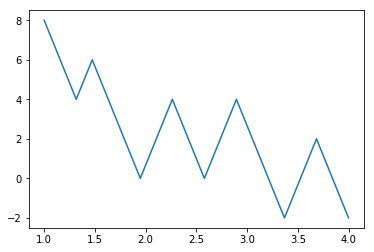

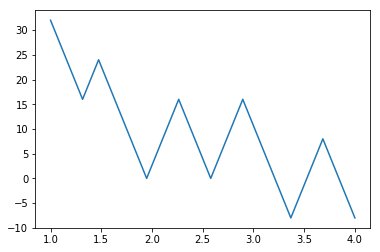

In [21]:
record = []
N_samples = 20
Temp = np.linspace(1, 4, 20) 
Magnetization = []
Energy = []
#grid = np.zeros((N, N), int)
grid = random_grid(N)
AverageMagnetization = []
AverageEnergy = []

for b in range(N_samples):
    #grid = random_grid(N)
    Magnetization = []
    Energy = []
    for a in range(N_trials):
        record.append(np.array(grid))
        # Note: the np.array(...) is important,
        #  this assigns a value rather than a reference.
        #  If you just did record.append(grid), you 
        #  append a reference to the current value of "grid"
        #  ... this gets updated, and so every element of record gets updated
        grid_update(grid,1/Temp[b])
        #plt.imshow(grid)
        #plt.show()
        Magnetization.append(total_magnetization(grid))
        Energy.append(total_energy(grid))
    AverageMagnetization.append(sum_array(Magnetization)/N_trials)
    AverageEnergy.append(sum_array(Energy)/N_trials)

plt.plot(Temp, Magnetization)
plt.show()
plt.plot(Temp, Energy)
plt.show()

    
#for a in range(N_trials):
    #plt.imshow(record[a])
    #plt.show()